In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('BPI_Challenge_2017_rfc_xgboost.csv')


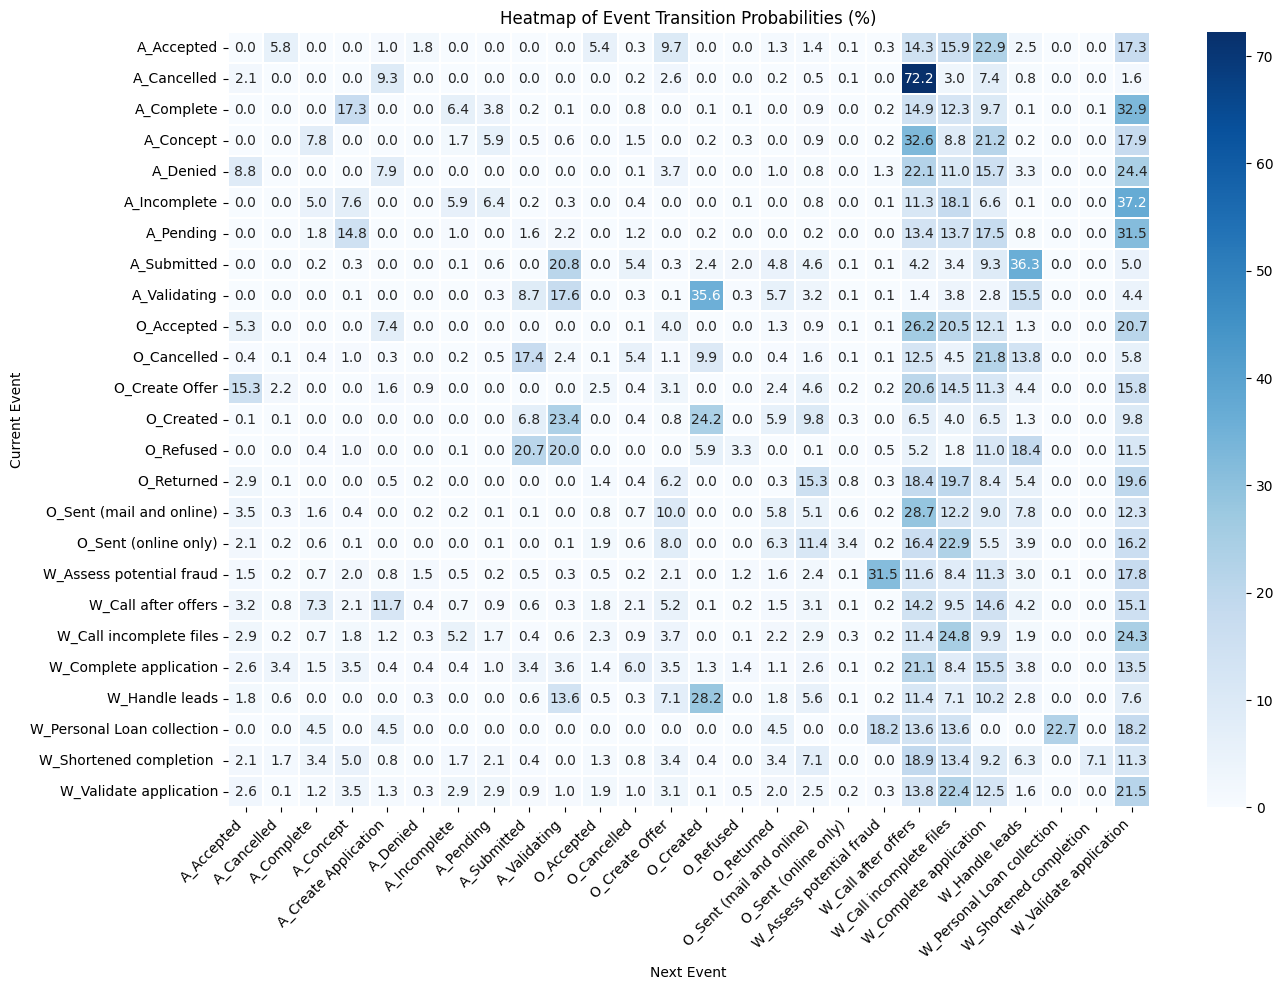

In [4]:
# Preparing data for the heatmap of current event to next event transitions
data_sorted = df.sort_values(by=['case:concept:name', 'time:timestamp diff']).reset_index(drop=True)
data_sorted['next_event'] = data_sorted.groupby('case:concept:name')['concept:name'].shift(-1)

# Counting transitions from current event to next event
transition_counts = data_sorted.groupby(['concept:name', 'next_event']).size().unstack(fill_value=0)

# Calculate the percentage of each transition from the total transitions for that event
transition_probabilities = transition_counts.div(transition_counts.sum(axis=1), axis=0) * 100

# Plotting the heatmap with transition probabilities
plt.figure(figsize=(14, 10))
sns.heatmap(transition_probabilities, cmap='Blues', linewidths=.1, annot=True, fmt=".1f")
plt.title('Heatmap of Event Transition Probabilities (%)')
plt.xlabel('Next Event')
plt.ylabel('Current Event')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
data_sorted.columns

Index(['Unnamed: 0', 'Action', 'org:resource', 'concept:name', 'EventOrigin',
       'EventID', 'lifecycle:transition', 'time:timestamp', 'case:LoanGoal',
       'case:ApplicationType', 'case:concept:name', 'case:RequestedAmount',
       'FirstWithdrawalAmount', 'NumberOfTerms', 'Accepted', 'MonthlyCost',
       'Selected', 'CreditScore', 'OfferedAmount', 'OfferID',
       'start_timestamp', 'time:timestamp diff', 'next time:timestamp',
       'next time:timestamp naive', 'next concept:name naive',
       'next concept:name', 'next concept:name rfc',
       'next time:timestamp XGBoost', 'next_event'],
      dtype='object')

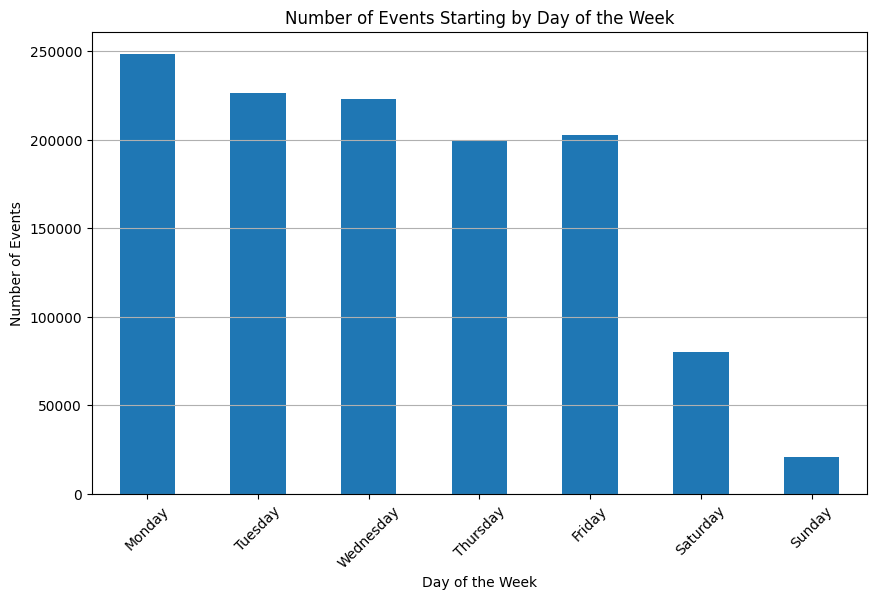

In [6]:
# Ensure 'time:timestamp' is converted to datetime format
data_sorted['time:timestamp'] = pd.to_datetime(data_sorted['time:timestamp'])

# If 'start_time' is derived from 'time:timestamp', assign it correctly
data_sorted['start_time'] = data_sorted['time:timestamp']

# Now, you can safely use .dt accessor
data_sorted['day_of_week'] = data_sorted['start_time'].dt.day_name()

# Continue with the day of the week analysis as before
events_by_day_of_week = data_sorted['day_of_week'].value_counts().sort_index()
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
events_by_day_of_week = events_by_day_of_week.reindex(ordered_days)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
events_by_day_of_week.plot(kind='bar')
plt.title('Number of Events Starting by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


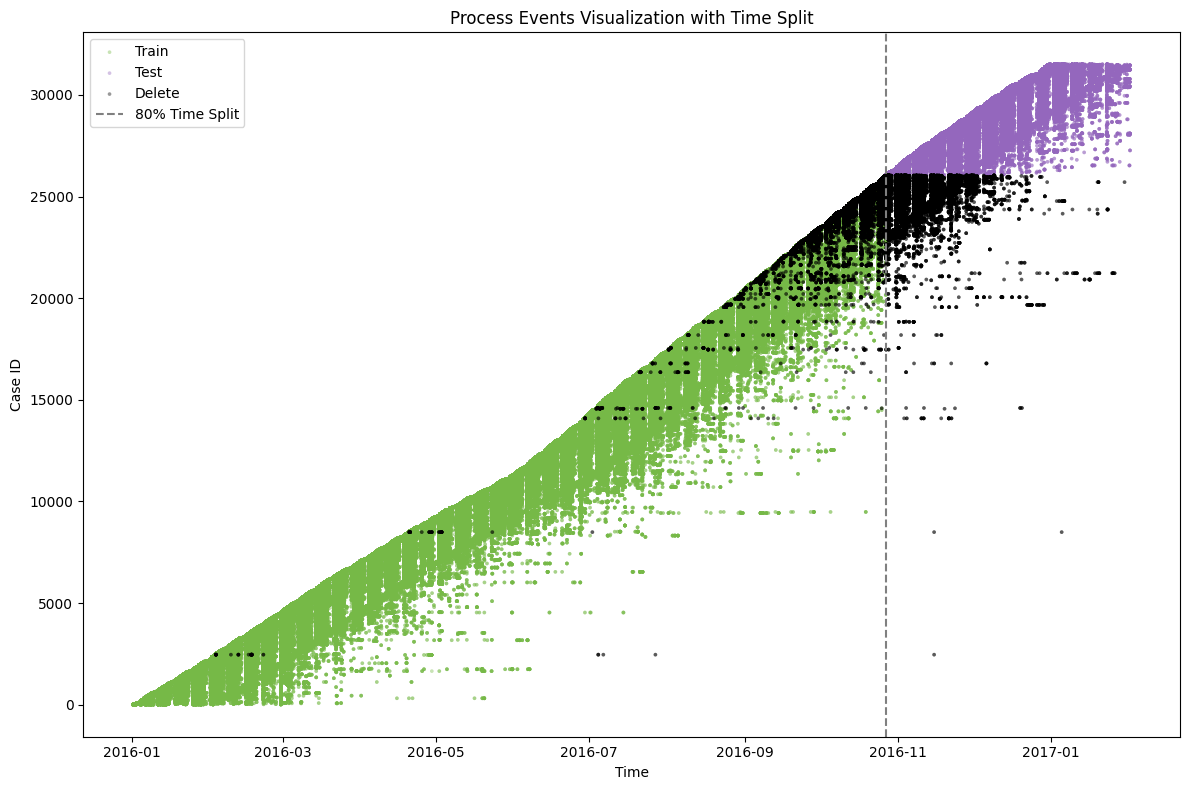

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame and it has already been loaded and preprocessed

# Ensure 'time:timestamp' is in datetime format for plotting
df['time:timestamp'] = pd.to_datetime(df['time:timestamp'], errors='coerce')

# Determine the 90% time split point
split_time_point = np.percentile(df['time:timestamp'], 80)

# Calculate the start and end times for each case:concept:name
process_times = df.groupby('case:concept:name')['time:timestamp'].agg(start_time='min', end_time='max')

# Determine the category for each process based on the start and end times relative to the split point
process_times['category'] = 'Train'  # Default category
process_times.loc[process_times['end_time'] > split_time_point, 'category'] = 'Test'
process_times.loc[(process_times['start_time'] < split_time_point) & (process_times['end_time'] > split_time_point), 'category'] = 'Delete'

# Map the category back to the original dataframe
df['category'] = df['case:concept:name'].map(process_times['category'])

# Assign improved colors based on the category
color_map = {
    'Train': '#76b947',  # Greenish
    'Test': '#9467bd',   # Purplish
    'Delete': 'black'  # Orange
}
df['color'] = df['category'].map(color_map)


# Factorize case:concept:name to use as y-axis values
df['y'] = pd.factorize(df['case:concept:name'])[0]

# Plotting
plt.figure(figsize=(12, 8))

# Scatter plot for each category
for category, color in color_map.items():
    subset = df[df['category'] == category]
    plt.scatter(subset['time:timestamp'], subset['y'], c=color, alpha=0.4, label=category, s=7, edgecolor='none')

# Add vertical line for the 90% time split
plt.axvline(x=split_time_point, color='grey', linestyle='--', label='80% Time Split')

plt.xlabel('Time')
plt.ylabel('Case ID')
plt.title('Process Events Visualization with Time Split')
plt.legend()
plt.tight_layout()

plt.show()


In [8]:
df.columns

Index(['Unnamed: 0', 'Action', 'org:resource', 'concept:name', 'EventOrigin',
       'EventID', 'lifecycle:transition', 'time:timestamp', 'case:LoanGoal',
       'case:ApplicationType', 'case:concept:name', 'case:RequestedAmount',
       'FirstWithdrawalAmount', 'NumberOfTerms', 'Accepted', 'MonthlyCost',
       'Selected', 'CreditScore', 'OfferedAmount', 'OfferID',
       'start_timestamp', 'time:timestamp diff', 'next time:timestamp',
       'next time:timestamp naive', 'next concept:name naive',
       'next concept:name', 'next concept:name rfc',
       'next time:timestamp XGBoost', 'category', 'color', 'y'],
      dtype='object')

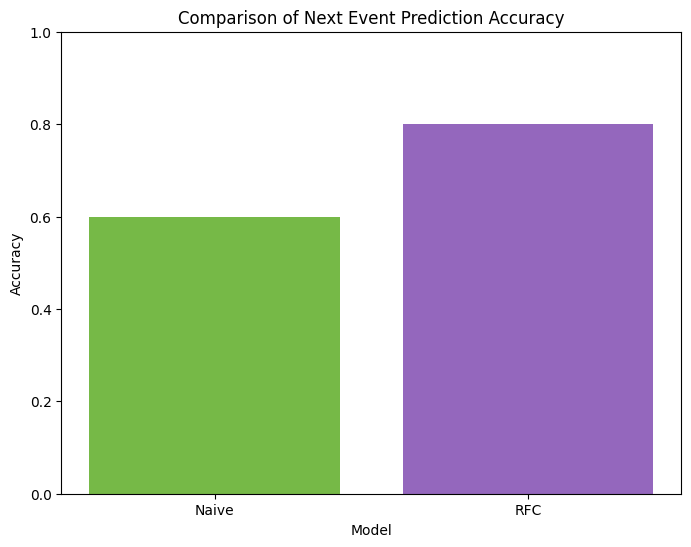

In [9]:
import matplotlib.pyplot as plt

# Placeholder accuracy values - replace these with your actual calculations
accuracy_naive = 0.6
accuracy_rfc = 0.8

# Bar chart
plt.figure(figsize=(8, 6))
models = ['Naive', 'RFC']
accuracies = [accuracy_naive, accuracy_rfc]
plt.bar(models, accuracies, color=['#76b947', '#9467bd'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Next Event Prediction Accuracy')
plt.ylim(0, 1)  # Assuming accuracy values are between 0 and 1
plt.show()


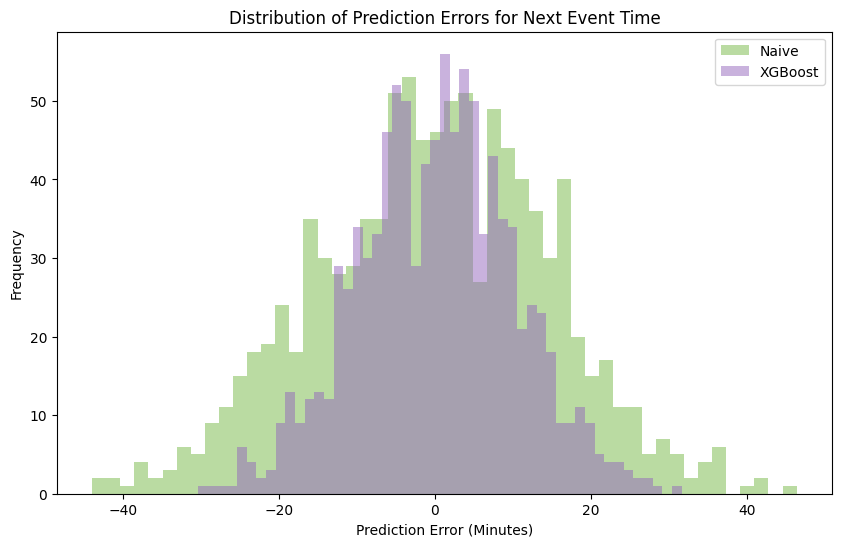

In [10]:
import numpy as np

# Placeholder error calculations - replace with your actual error data
errors_xgboost = np.random.normal(0, 10, 1000)  # Example error data for XGBoost
errors_naive = np.random.normal(0, 15, 1000)    # Example error data for Naive

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(errors_naive, bins=50, alpha=0.5, label='Naive', color='#76b947')
plt.hist(errors_xgboost, bins=50, alpha=0.5, label='XGBoost', color='#9467bd')
plt.xlabel('Prediction Error (Minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors for Next Event Time')
plt.legend()
plt.show()


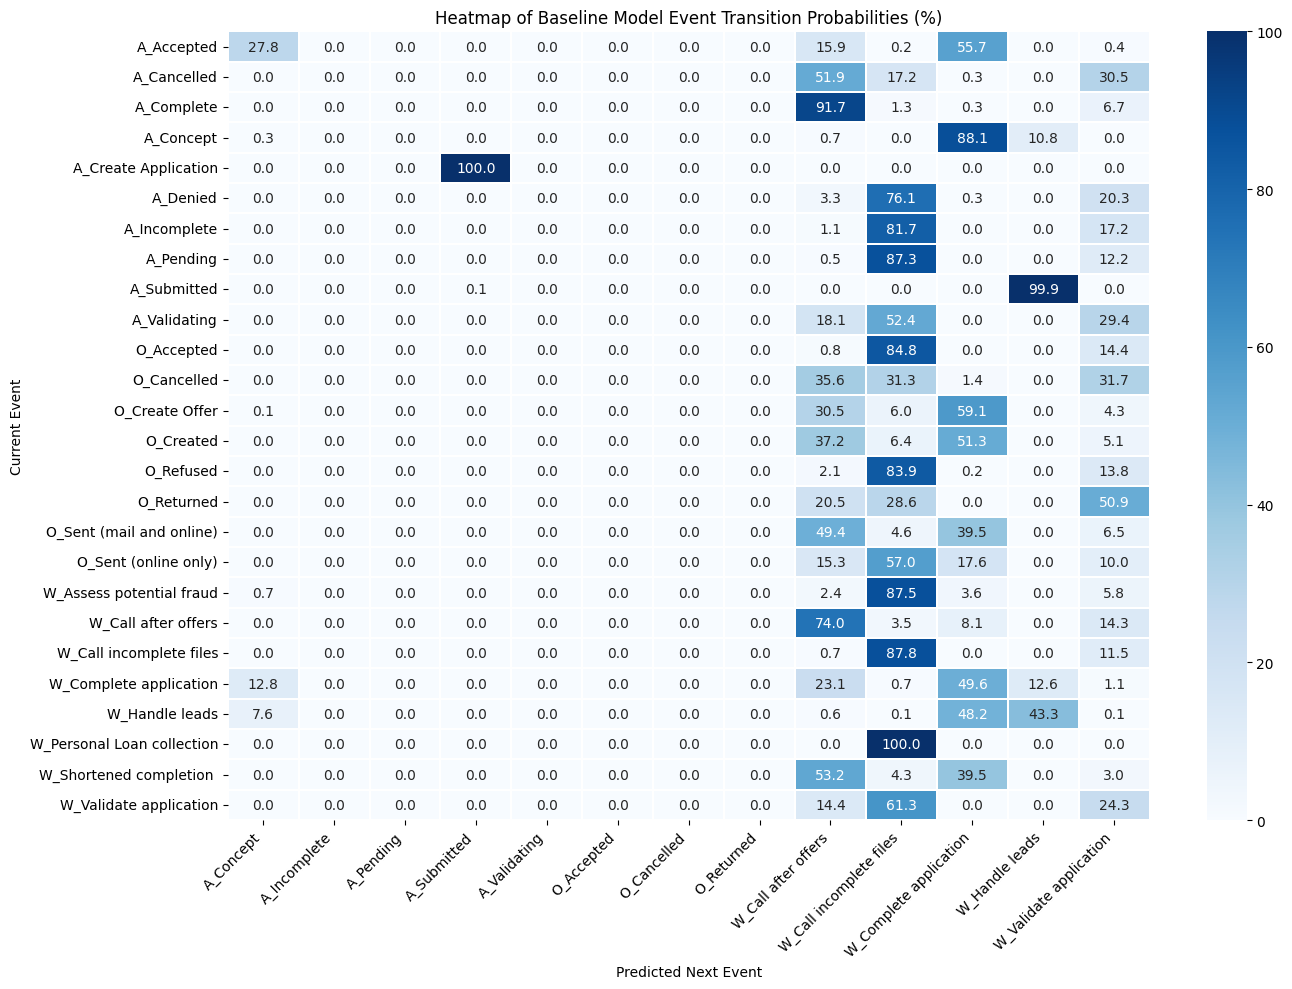

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame

# Use 'next concept:name naive' for the baseline model's predicted next event
transition_counts_baseline = df.groupby(['concept:name', 'next concept:name naive']).size().unstack(fill_value=0)

# Calculate the percentage of each transition for the baseline model
transition_probabilities_baseline = transition_counts_baseline.div(transition_counts_baseline.sum(axis=1), axis=0) * 100

# Plotting the heatmap for the baseline model
plt.figure(figsize=(14, 10))
sns.heatmap(transition_probabilities_baseline, cmap='Blues', linewidths=.1, annot=True, fmt=".1f")
plt.title('Heatmap of Baseline Model Event Transition Probabilities (%)')
plt.xlabel('Predicted Next Event')
plt.ylabel('Current Event')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



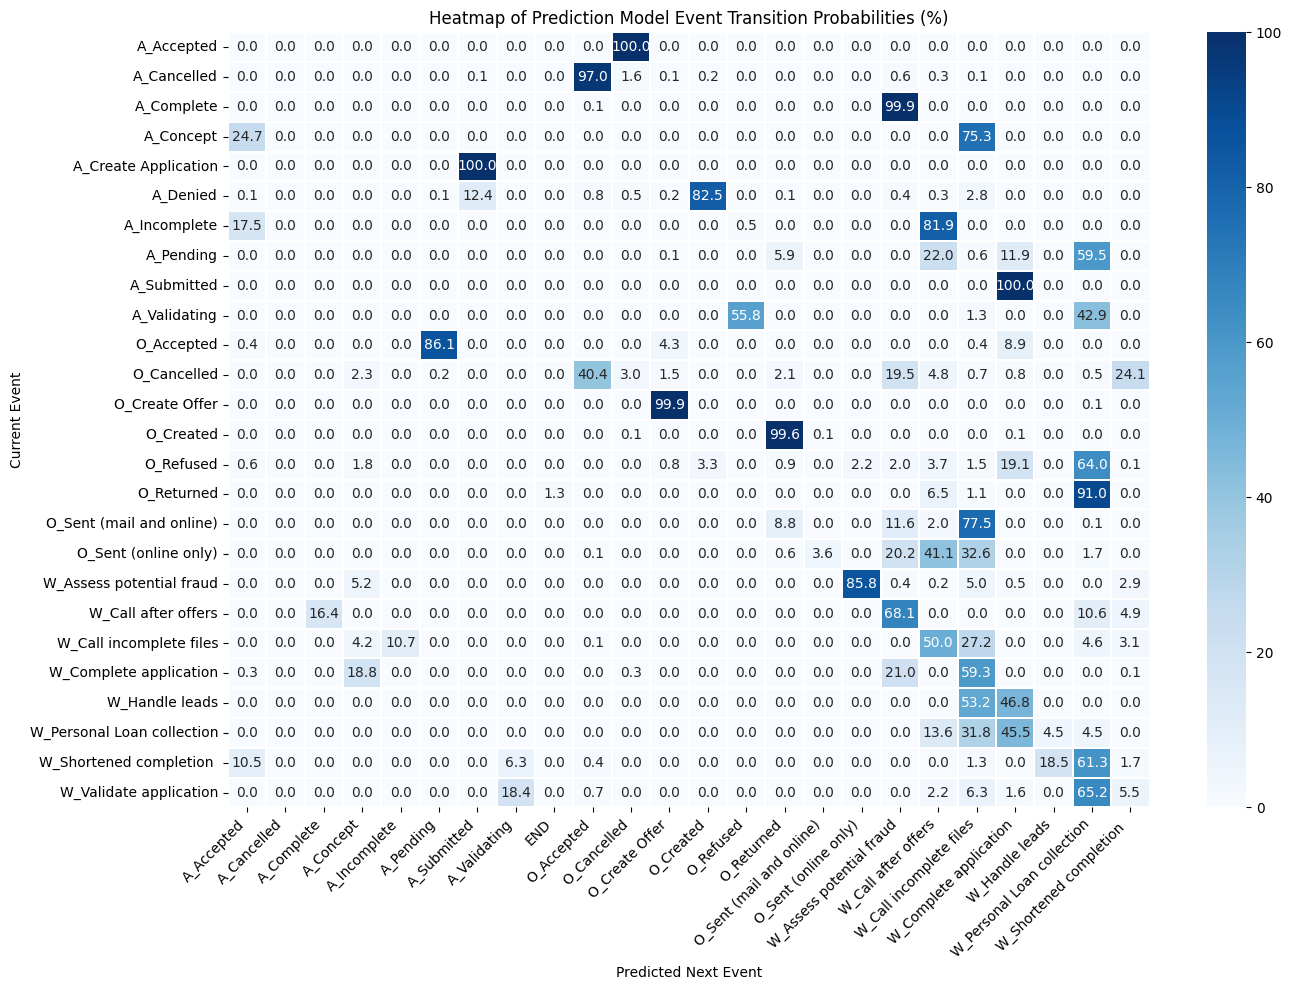

In [12]:
# Use 'next concept:name rfc' for the prediction model's predicted next event
transition_counts_prediction = df.groupby(['concept:name', 'next concept:name rfc']).size().unstack(fill_value=0)

# Calculate the percentage of each transition for the prediction model
transition_probabilities_prediction = transition_counts_prediction.div(transition_counts_prediction.sum(axis=1), axis=0) * 100

# Plotting the heatmap for the prediction model
plt.figure(figsize=(14, 10))
sns.heatmap(transition_probabilities_prediction, cmap='Blues', linewidths=.1, annot=True, fmt=".1f")
plt.title('Heatmap of Prediction Model Event Transition Probabilities (%)')
plt.xlabel('Predicted Next Event')
plt.ylabel('Current Event')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


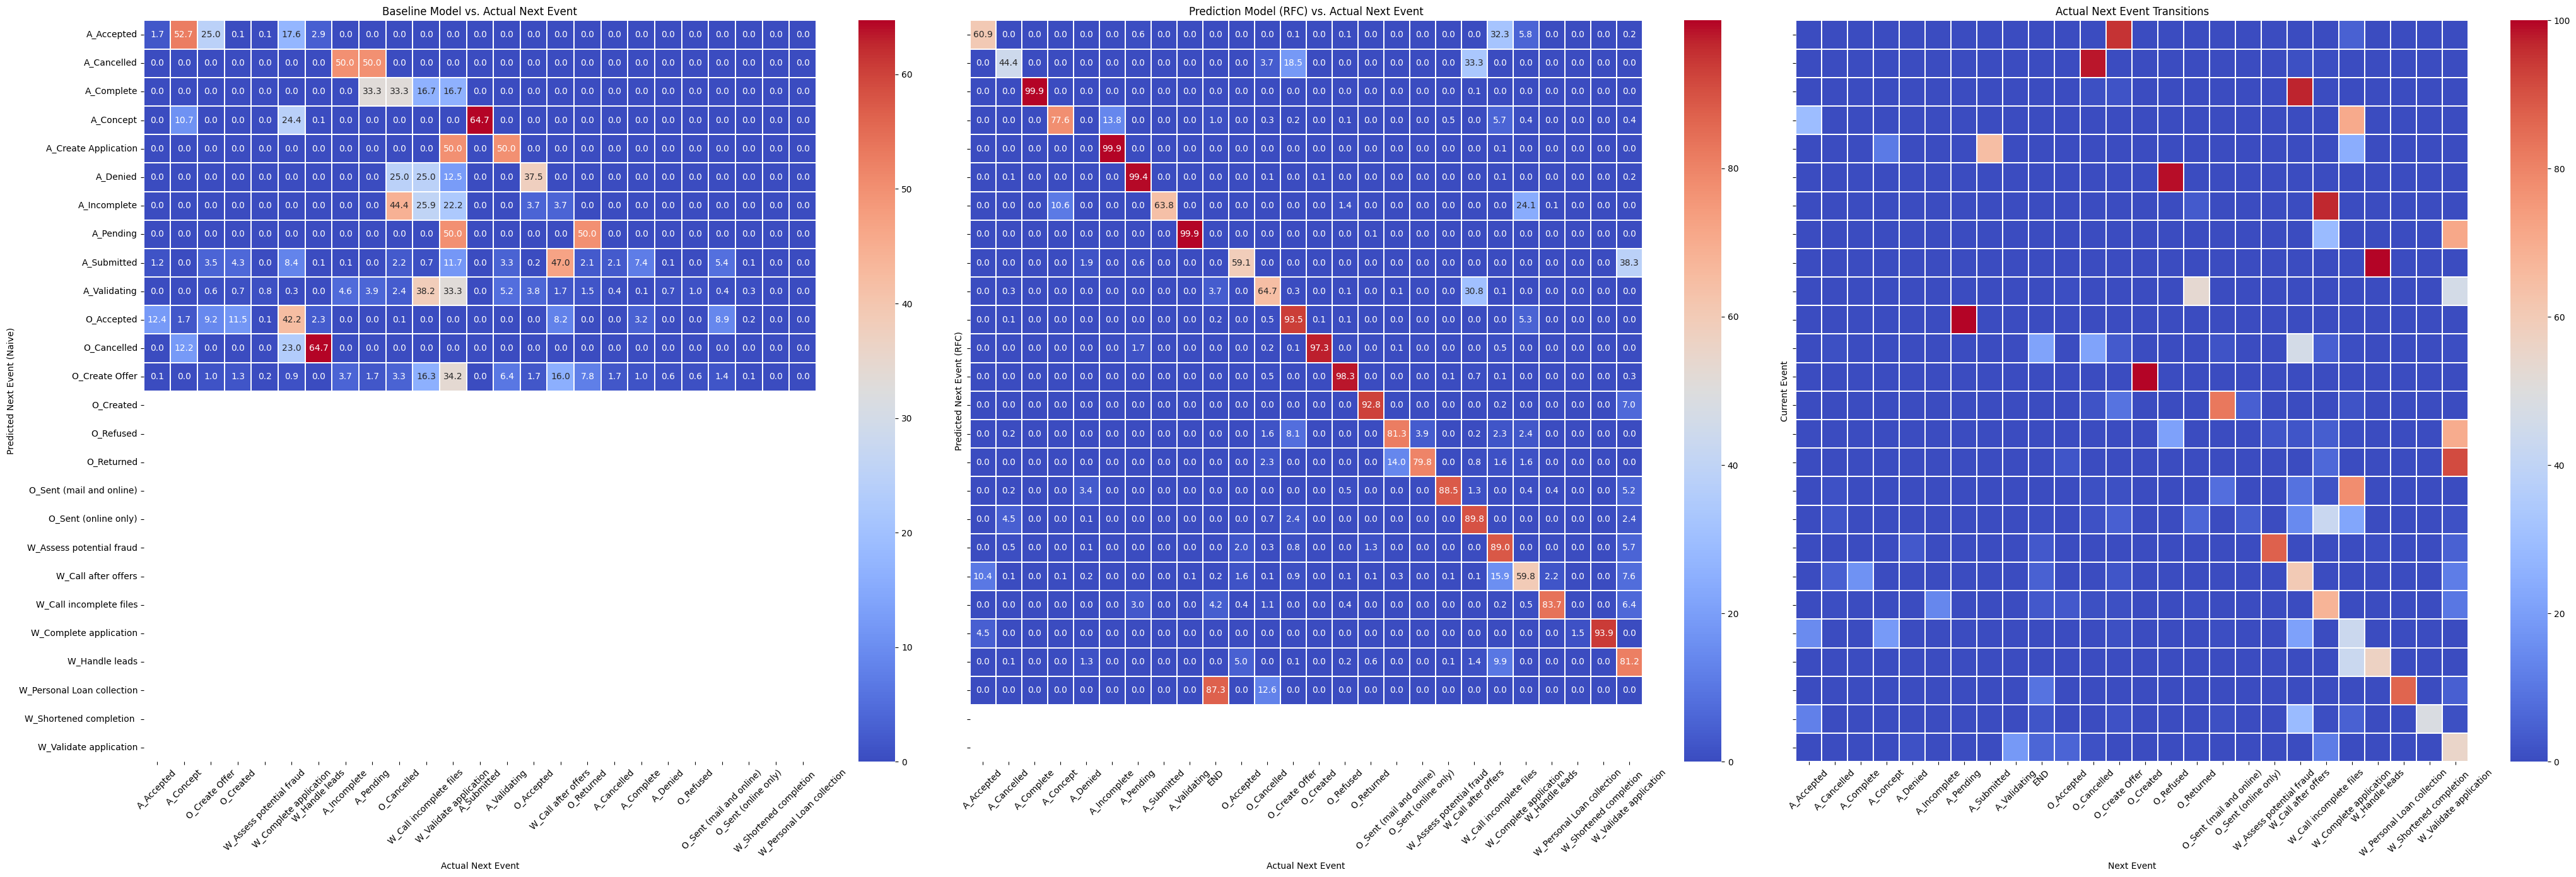

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame and is already prepared with the necessary columns

# For Predicted (Baseline Model) vs. Actual Next Event
transition_counts_baseline_vs_actual = (
    df.groupby(['next concept:name naive', 'next concept:name'])
    .size().unstack(fill_value=0)
)
transition_probabilities_baseline_vs_actual = (
    transition_counts_baseline_vs_actual
    .div(transition_counts_baseline_vs_actual.sum(axis=1), axis=0) * 100
)

# For Predicted (Primary Prediction Model) vs. Actual Next Event
transition_counts_prediction_vs_actual = (
    df.groupby(['next concept:name rfc', 'next concept:name'])
    .size().unstack(fill_value=0)
)
transition_probabilities_prediction_vs_actual = (
    transition_counts_prediction_vs_actual
    .div(transition_counts_prediction_vs_actual.sum(axis=1), axis=0) * 100
)

# For Actual Next Event Transitions (benchmark)
transition_counts_actual = (
    df.groupby(['concept:name', 'next concept:name'])
    .size().unstack(fill_value=0)
)
transition_probabilities_actual = (
    transition_counts_actual
    .div(transition_counts_actual.sum(axis=1), axis=0) * 100
)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(42, 14), sharey=True)

# Heatmap for Baseline Model vs. Actual
sns.heatmap(transition_probabilities_baseline_vs_actual, cmap='coolwarm', linewidths=.1, annot=True, fmt=".1f", ax=axs[0])
axs[0].set_title('Baseline Model vs. Actual Next Event')
axs[0].set_xlabel('Actual Next Event')
axs[0].set_ylabel('Predicted Next Event (Naive)')
axs[0].tick_params(axis='x', rotation=45)

# Heatmap for Prediction Model vs. Actual
sns.heatmap(transition_probabilities_prediction_vs_actual, cmap='coolwarm', linewidths=.1, annot=True, fmt=".1f", ax=axs[1])
axs[1].set_title('Prediction Model (RFC) vs. Actual Next Event')
axs[1].set_xlabel('Actual Next Event')
axs[1].set_ylabel('Predicted Next Event (RFC)')
axs[1].tick_params(axis='x', rotation=45)

# Heatmap for Actual Transitions (benchmark)
sns.heatmap(transition_probabilities_actual, cmap='coolwarm', linewidths=.1, annot=False, ax=axs[2])
axs[2].set_title('Actual Next Event Transitions')
axs[2].set_xlabel('Next Event')
axs[2].set_ylabel('Current Event')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


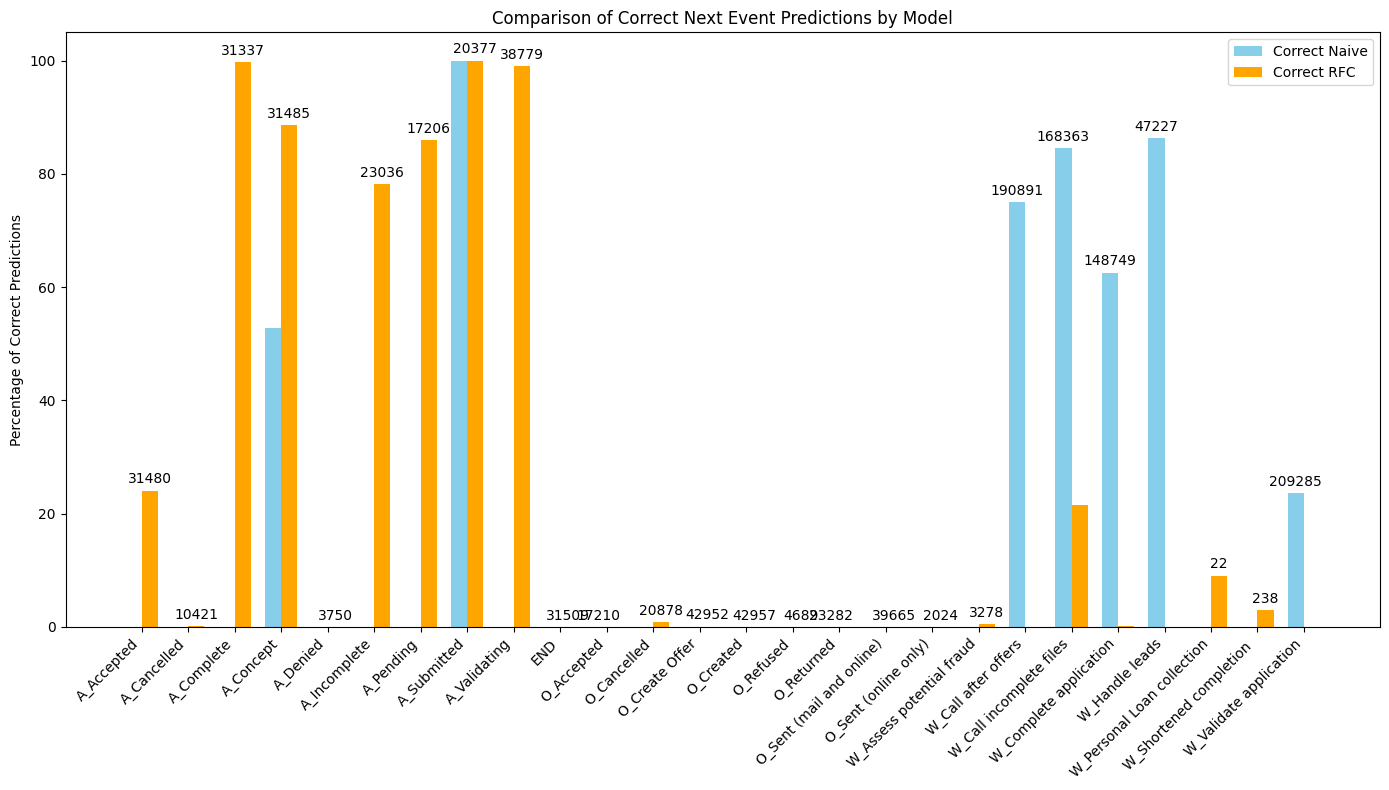

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Identify correct predictions for each model
df['Correct (Naive)'] = df['next concept:name'] == df['next concept:name naive']
df['Correct (RFC)'] = df['next concept:name'] == df['next concept:name rfc']

# Aggregate these correct predictions by the actual event ('concept:name')
correct_counts_naive = df.groupby('next concept:name')['Correct (Naive)'].sum()
correct_counts_rfc = df.groupby('next concept:name')['Correct (RFC)'].sum()

# Count the total occurrences of each actual event to know how many predictions were made
total_counts = df.groupby('next concept:name').size()

# Combine these into a DataFrame
prediction_comparison = pd.DataFrame({
    'Total Counts': total_counts,
    'Correct Naive': correct_counts_naive,
    'Correct RFC': correct_counts_rfc,
})

# Convert counts to percentages for visualization
prediction_comparison['Correct Naive (%)'] = (prediction_comparison['Correct Naive'] / prediction_comparison['Total Counts']) * 100
prediction_comparison['Correct RFC (%)'] = (prediction_comparison['Correct RFC'] / prediction_comparison['Total Counts']) * 100


# Convert counts to percentages
prediction_comparison['Correct Naive (%)'] = (prediction_comparison['Correct Naive'] / prediction_comparison['Total Counts']) * 100
prediction_comparison['Correct RFC (%)'] = (prediction_comparison['Correct RFC'] / prediction_comparison['Total Counts']) * 100

# Setting the positions and width for the bars
positions = np.arange(len(prediction_comparison))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))

# Plotting both bars for Naive and RFC model predictions next to each other
naive_bars = ax.bar(positions - bar_width/2, prediction_comparison['Correct Naive (%)'], bar_width, label='Correct Naive', color='skyblue')
rfc_bars = ax.bar(positions + bar_width/2, prediction_comparison['Correct RFC (%)'], bar_width, label='Correct RFC', color='orange')

ax.set_ylabel('Percentage of Correct Predictions')
ax.set_title('Comparison of Correct Next Event Predictions by Model')
ax.set_xticks(positions)
ax.set_xticklabels(prediction_comparison.index, rotation=45, ha='right')
ax.legend()

# Function to add labels on top of the higher bar between Naive and RFC, showing total actual next events
def add_labels(naive_bars, rfc_bars, total_counts):
    for naive_bar, rfc_bar, count in zip(naive_bars, rfc_bars, total_counts):
        # Determine the higher bar and its height
        higher_bar = naive_bar if naive_bar.get_height() > rfc_bar.get_height() else rfc_bar
        height = higher_bar.get_height()
        
        # Annotate the higher bar with the total count
        ax.annotate(f'{count}',
                    xy=(higher_bar.get_x() + higher_bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(naive_bars, rfc_bars, prediction_comparison['Total Counts'])

plt.tight_layout()
plt.show()


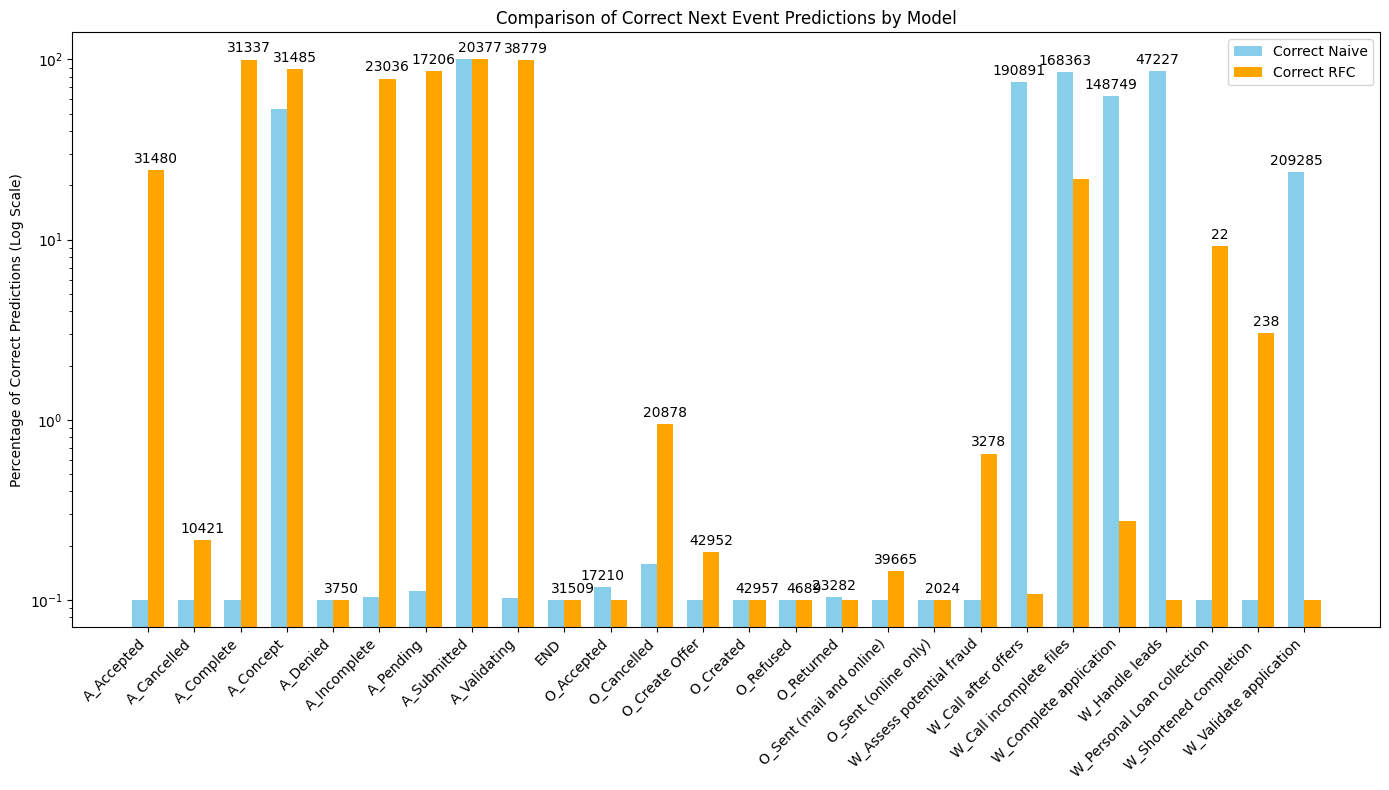

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming the preparation steps for df and prediction_comparison are done as before

# Convert counts to percentages
prediction_comparison['Correct Naive (%)'] += 0.1  # Adding a small value to avoid log(0)
prediction_comparison['Correct RFC (%)'] += 0.1  # Adding a small value to avoid log(0)

# Setting the positions and width for the bars
positions = np.arange(len(prediction_comparison))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))

# Plotting both bars for Naive and RFC model predictions next to each other
naive_bars = ax.bar(positions - bar_width/2, prediction_comparison['Correct Naive (%)'], bar_width, label='Correct Naive', color='skyblue')
rfc_bars = ax.bar(positions + bar_width/2, prediction_comparison['Correct RFC (%)'], bar_width, label='Correct RFC', color='orange')

# Set the y-axis to a log scale
ax.set_yscale('log')

ax.set_ylabel('Percentage of Correct Predictions (Log Scale)')
ax.set_title('Comparison of Correct Next Event Predictions by Model')
ax.set_xticks(positions)
ax.set_xticklabels(prediction_comparison.index, rotation=45, ha='right')
ax.legend()

# Adjusting the add_labels function for log scale (logarithm of percentages)
def add_labels(naive_bars, rfc_bars, total_counts):
    for naive_bar, rfc_bar, count in zip(naive_bars, rfc_bars, total_counts):
        # Determine the higher bar and its height
        higher_bar = naive_bar if naive_bar.get_height() > rfc_bar.get_height() else rfc_bar
        height = higher_bar.get_height()
        
        # Annotate the higher bar with the total count, adjust for log scale
        ax.annotate(f'{count}',
                    xy=(higher_bar.get_x() + higher_bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(naive_bars, rfc_bars, prediction_comparison['Total Counts'])

plt.tight_layout()
plt.show()


In [16]:
prediction_comparison

,Total Counts,Correct Naive,Correct RFC,Correct Naive (%),Correct RFC (%)
next concept:name,,,,,
A_Accepted,31480,0,7585,0.100000,24.194663
A_Cancelled,10421,0,12,0.100000,0.215152
A_Complete,31337,0,31240,0.100000,99.790462
A_Concept,31485,16598,27881,52.817167,88.653279
A_Denied,3750,0,0,0.100000,0.100000
A_Incomplete,23036,1,18031,0.104341,78.373138
A_Pending,17206,2,14796,0.111624,86.093258
A_Submitted,20377,20377,20377,100.100000,100.100000
A_Validating,38779,1,38387,0.102579,99.089144


In [38]:

df['time to next event:actual'] = (df['next time:timestamp'] - df['time:timestamp']).dt.total_seconds() 
df['time to next event:naive'] = (df['next time:timestamp naive'] - df['time:timestamp']).dt.total_seconds() 
df['time to next event:XGBoost'] = (pd.to_datetime(df['next time:timestamp XGBoost']) - df['time:timestamp']).dt.total_seconds() 

# Calculate prediction errors in hours
df['error_naive'] = df['time to next event:actual'] - df['time to next event:naive']
df['error_xgboost'] = df['time to next event:actual'] - df['time to next event:XGBoost']

#df['time to next event:actual'] = pd.to_datetime(df['time to next event:actual'], errors='coerce')
#df['time to next event:naive'] = pd.to_datetime(df['time to next event:naive'], errors='coerce')
#df['time to next event:XGBoost'] = pd.to_datetime(df['time to next event:XGBoost'], errors='coerce')

In [43]:
# Assuming df is your DataFrame and has 'error_naive' and 'error_xgboost' columns calculated

# Sum of prediction errors for the Naive model
sum_errors_naive = df.groupby('concept:name')['error_naive'].sum().reset_index().rename(columns={'error_naive': 'Sum of Prediction Error (Hours)'})

# Sum of prediction errors for the XGBoost model
sum_errors_xgboost = df.groupby('concept:name')['error_xgboost'].sum().reset_index().rename(columns={'error_xgboost': 'Sum of Prediction Error (Hours)'})


In [45]:
# Confirm unique predictions
print("Unique naive predictions:", df['next time:timestamp naive'].nunique())
print("Unique XGBoost predictions:", df['next time:timestamp XGBoost'].nunique())



Unique naive predictions: 1200483
Unique XGBoost predictions: 1201090


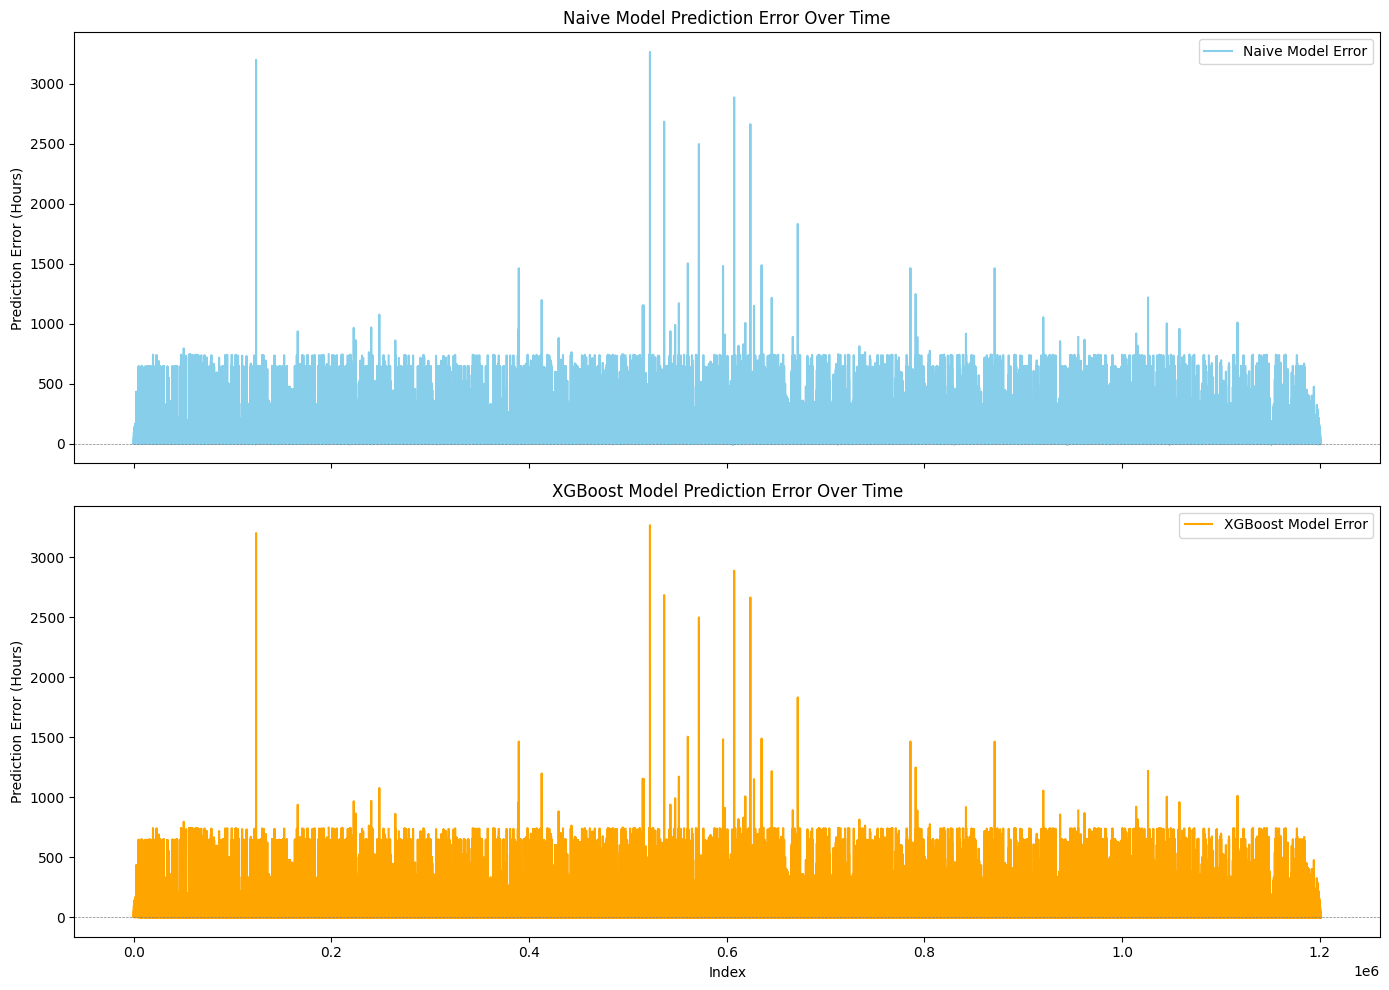

In [49]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# Naive Model Errors Line Plot
axes[0].plot(df.index, df['error_naive'], label='Naive Model Error', color='skyblue')
axes[0].set_title('Naive Model Prediction Error Over Time')
axes[0].set_ylabel('Prediction Error (Hours)')
axes[0].axhline(0, color='grey', linewidth=0.5, linestyle='--')
axes[0].legend()

# XGBoost Model Errors Line Plot
axes[1].plot(df.index, df['error_xgboost'], label='XGBoost Model Error', color='orange')
axes[1].set_title('XGBoost Model Prediction Error Over Time')
axes[1].set_ylabel('Prediction Error (Hours)')
axes[1].set_xlabel('Index')
axes[1].axhline(0, color='grey', linewidth=0.5, linestyle='--')
axes[1].legend()

# Show the plot
plt.tight_layout()
plt.show()


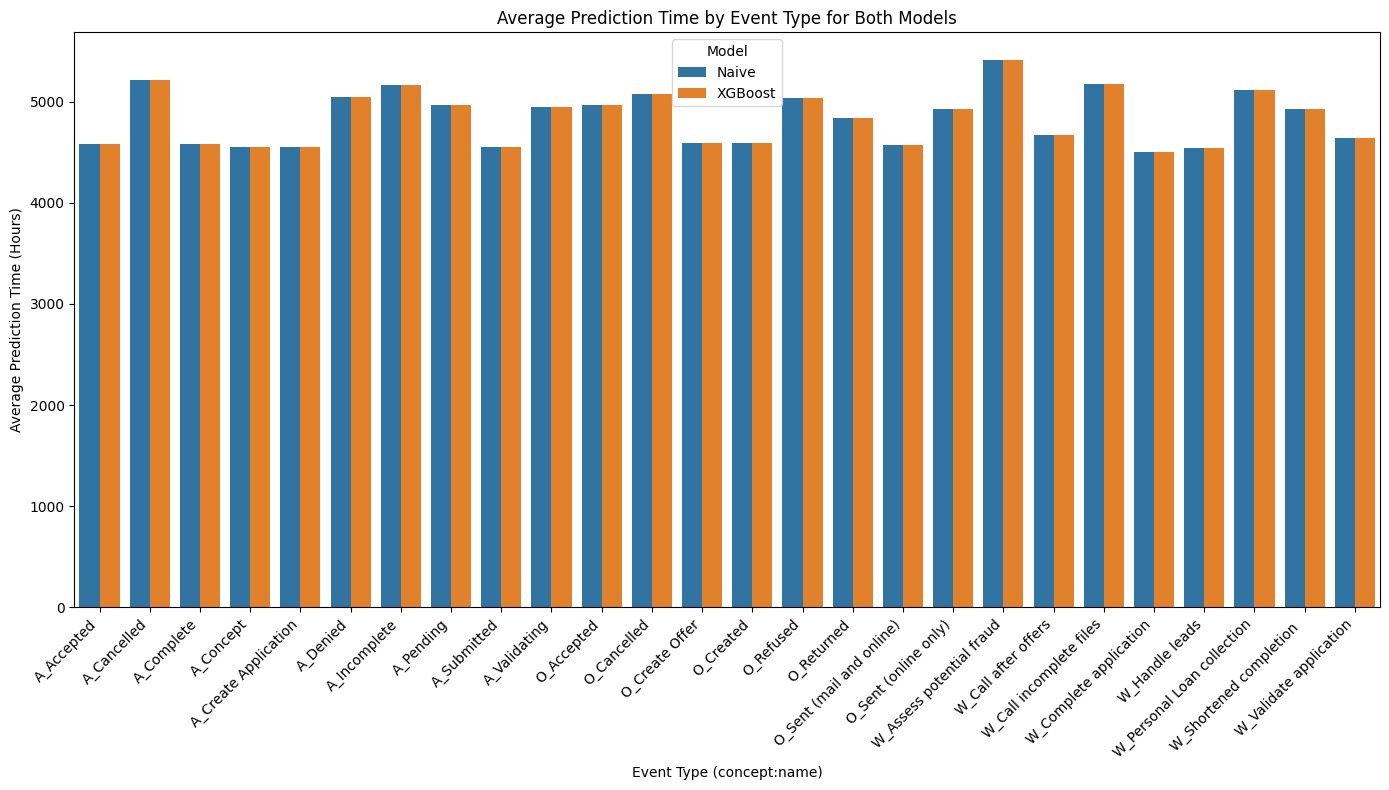

In [50]:
# Calculate mean prediction times for each concept:name and model
mean_prediction_times = prediction_long_df.groupby(['concept:name', 'Model'])['Prediction Time (Hours)'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='concept:name', y='Prediction Time (Hours)', hue='Model', data=mean_prediction_times)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Prediction Time (Hours)')
plt.xlabel('Event Type (concept:name)')
plt.title('Average Prediction Time by Event Type for Both Models')
plt.tight_layout()
plt.show()


In [22]:
df['time:timestamp']

0         2016-01-01 09:51:15.304
1         2016-01-01 09:51:15.352
2         2016-01-01 09:51:15.774
3         2016-01-01 09:52:36.392
4         2016-01-01 09:52:36.403
                    ...          
1201085   2017-02-01 14:00:30.347
1201086   2017-02-01 14:01:24.191
1201087   2017-02-01 14:09:03.331
1201088   2017-02-01 14:10:52.793
1201089   2017-02-01 14:11:03.499
Name: time:timestamp, Length: 1201090, dtype: datetime64[ns]